In [58]:
import numpy as np
import pandas as pd
import numpy.linalg as lin
import matplotlib.pyplot as plt


In [59]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import time

In [60]:
data = pd.read_csv('word_embedding.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,the,-0.038194,-0.244870,0.728120,-0.399610,0.083172,0.043953,-0.39141,0.334400,-0.57545,...,0.016215,-0.017099,-0.38984,0.87424,-0.72569,-0.51058,-0.520280,-0.145900,0.82780,0.27062
1,of,-0.152900,-0.242790,0.898370,0.169960,0.535160,0.487840,-0.58826,-0.179820,-1.35810,...,0.187120,-0.018488,-0.26757,0.72700,-0.59363,-0.34839,-0.560940,-0.591000,1.00390,0.20664
2,to,-0.189700,0.050024,0.190840,-0.049184,-0.089737,0.210060,-0.54952,0.098377,-0.20135,...,-0.131340,0.058617,-0.31869,-0.61419,-0.62393,-0.41548,-0.038175,-0.398040,0.47647,-0.15983
3,and,-0.071953,0.231270,0.023731,-0.506380,0.339230,0.195900,-0.32943,0.183640,-0.18057,...,0.014487,-0.625900,-0.32367,0.41862,-1.08070,0.46742,-0.499310,-0.718950,0.86894,0.19539
4,in,0.085703,-0.222010,0.165690,0.133730,0.382390,0.354010,0.01287,0.224610,-0.43817,...,0.402150,-0.127460,-0.20228,0.87368,-0.54500,0.79205,-0.206950,-0.074273,0.75808,-0.34243


In [61]:
# 라벨
labels =  data['0'].values
labels = labels[:10]
labels

array(['the', 'of', 'to', 'and', 'in', 'a', 'for', 'that', 'on', 'is'],
      dtype=object)

In [71]:
labels.shape

(10,)

In [86]:
labels = np.arange(0,10,dtype='int16')
labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int16)

In [62]:
# 라벨 제외 word 차원값들 
del data['0']
data = data.values
data = data[:10,:]

In [63]:
data.shape

(10, 100)

### kmeans로 군집화 시각화

In [87]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)

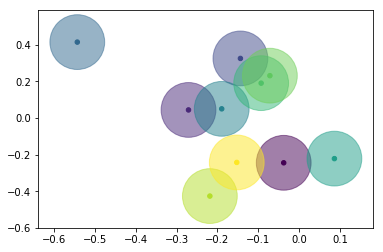

In [88]:
plt.scatter(data[:, 0], data[:, 1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c=labels, s=3000, alpha=0.5);


## PCA & t-sne

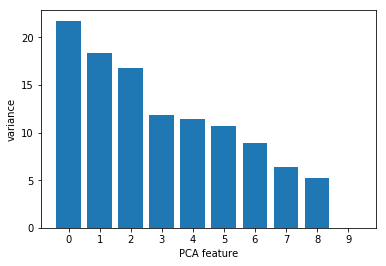

In [89]:
# 정규화
scaler = StandardScaler()

# pca , 디폴트 components는 n(전체 feature 수)
pca = PCA(10)

# pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(data)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

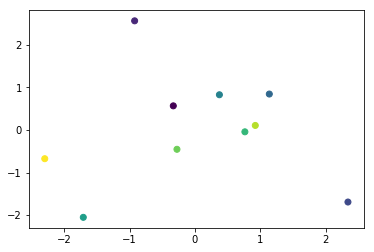

In [93]:
# 2차원
from sklearn.decomposition import PCA

model = PCA(n_components=2)
pca_features = model.fit_transform(data)

xf = pca_features[:,0]
yf = pca_features[:,1]
plt.scatter(xf,yf,c=labels);
plt.show();

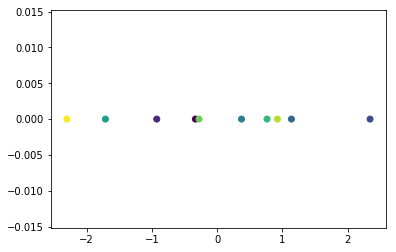

In [94]:
# 1차원
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA(n_components=1)
pca_features = model.fit_transform(data)

xf = pca_features[:,0]
yf = len(xf)*[0]
plt.scatter(xf,yf,c=labels);
plt.show();

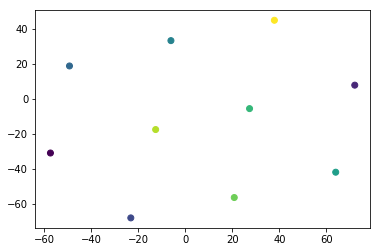

In [95]:
model = TSNE(learning_rate=100)
transformed = model.fit_transform(data)

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=labels)

plt.show()